In [215]:
# Importando as bibliotecas.
from pandas import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt


In [216]:
# Criando o dataframe (Dados obtidos em: https://www.portaltransparencia.gov.br/download-de-dados/auxilio-emergencial)
# As informações são referentes ao pagamento do Auxílio emergencial no mês 01(Janeiro) de 2021.
df = pd.read_csv("../datasets/202101_AuxilioEmergencial.csv", encoding = "ISO-8859-1", sep=";")

In [217]:
# Exibe os tipos de dados de todas as colunas do dataframe.
df.dtypes

MÊS DISPONIBILIZAÇÃO       int64
UF                        object
CÓDIGO MUNICÍPIO IBGE    float64
NOME MUNICÍPIO            object
NIS BENEFICIÁRIO         float64
CPF BENEFICIÁRIO          object
NOME BENEFICIÁRIO         object
NIS RESPONSÁVEL          float64
CPF RESPONSÁVEL           object
NOME RESPONSÁVEL          object
ENQUADRAMENTO             object
PARCELA                   object
OBSERVAÇÃO                object
VALOR BENEFÍCIO           object
dtype: object

In [218]:
# LIMPEZA

# Exibe a soma de ocorrências NA encontradas por coluna.
df.isna().sum()  # ou df.isnull().sum()

MÊS DISPONIBILIZAÇÃO          0
UF                          368
CÓDIGO MUNICÍPIO IBGE       368
NOME MUNICÍPIO              368
NIS BENEFICIÁRIO             15
CPF BENEFICIÁRIO             15
NOME BENEFICIÁRIO             0
NIS RESPONSÁVEL               7
CPF RESPONSÁVEL          583778
NOME RESPONSÁVEL              0
ENQUADRAMENTO                 0
PARCELA                       0
OBSERVAÇÃO                12186
VALOR BENEFÍCIO               0
dtype: int64

In [219]:
# LIMPEZA

# Preenche todos os valores NA com o valor NAO INFORMADO, impactando em todo dataframe daqui por diante.
df.fillna("NAO INFORMADO", inplace=True)

In [220]:
# LIMPEZA

# Exibe a soma de ocorrências NA encontradas por coluna.
df.isna().sum()  # ou df.isnull().sum()

MÊS DISPONIBILIZAÇÃO     0
UF                       0
CÓDIGO MUNICÍPIO IBGE    0
NOME MUNICÍPIO           0
NIS BENEFICIÁRIO         0
CPF BENEFICIÁRIO         0
NOME BENEFICIÁRIO        0
NIS RESPONSÁVEL          0
CPF RESPONSÁVEL          0
NOME RESPONSÁVEL         0
ENQUADRAMENTO            0
PARCELA                  0
OBSERVAÇÃO               0
VALOR BENEFÍCIO          0
dtype: int64

In [221]:
# VALIDAÇÃO

# Criando um schema do dataframe para validação.
schema = pa.DataFrameSchema(
    columns = {
        "MÊS DISPONIBILIZAÇÃO": pa.Column(pa.INT64),
        "UF": pa.Column(pa.Object),
        "CÓDIGO MUNICÍPIO IBGE": pa.Column(pa.Object),
        "NOME MUNICÍPIO": pa.Column(pa.Object),
        "NIS BENEFICIÁRIO": pa.Column(pa.Object),
        "CPF BENEFICIÁRIO": pa.Column(pa.Object),
        "NOME BENEFICIÁRIO": pa.Column(pa.Object),
        "NIS RESPONSÁVEL": pa.Column(pa.Object),
        "CPF RESPONSÁVEL": pa.Column(pa.Object),
        "NOME RESPONSÁVEL": pa.Column(pa.Object),
        "ENQUADRAMENTO": pa.Column(pa.Object),
        "PARCELA": pa.Column(pa.Object),
        "OBSERVAÇÃO": pa.Column(pa.Object),
        "VALOR BENEFÍCIO": pa.Column(pa.Object)
    }
)

In [222]:
# Executando validação (Panderas).
schema.validate(df)

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,9ª,Não há,"300,00"
1,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,8ª,Não há,"300,00"
2,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,6ª,Não há,"300,00"
3,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,7ª,Não há,"300,00"
4,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.000,***.866.782-**,AARAO COSTA SERRUYA,-2.000,NAO INFORMADO,Não se aplica,EXTRACAD,2ª,Não há,"600,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595924,202101,TO,1722107.000,XAMBIOA,0.000,***.369.301-**,MARIA POLIANA ALVES ANGELICA DOS SANTOS,-2.000,NAO INFORMADO,Não se aplica,EXTRACAD,5ª,Pagamento bloqueado ou cancelado,"600,00"
595925,202101,TO,1722107.000,XAMBIOA,20112231041.000,***.844.441-**,MUNIK HEVELEN NUNES PEREIRA,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,5ª,Pagamento bloqueado ou cancelado,"600,00"
595926,202101,TO,1722107.000,XAMBIOA,16595747554.000,***.392.651-**,RENATA DELLA MARCES SOARES LUZ,16595747554.000,***.392.651-**,RENATA DELLA MARCES SOARES LUZ,BOLSA FAMILIA,2ª,NAO INFORMADO,"195,00"
595927,202101,TO,1722107.000,XAMBIOA,0.000,***.480.791-**,SAMARA MARSELHIE CARDOSO ALVES,-2.000,NAO INFORMADO,Não se aplica,EXTRACAD,5ª,Pagamento bloqueado ou cancelado,"600,00"


In [223]:
# Exibe as 5 primeiras colunas do dataframe e seus dados.
df.head(5)

,MÊS DISPONIBILIZAÇÃO,UF,CÓDIGO MUNICÍPIO IBGE,NOME MUNICÍPIO,NIS BENEFICIÁRIO,CPF BENEFICIÁRIO,NOME BENEFICIÁRIO,NIS RESPONSÁVEL,CPF RESPONSÁVEL,NOME RESPONSÁVEL,ENQUADRAMENTO,PARCELA,OBSERVAÇÃO,VALOR BENEFÍCIO
0,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,9ª,Não há,"300,00"
1,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,8ª,Não há,"300,00"
2,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,6ª,Não há,"300,00"
3,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,*** BENEFICIÁRIO MENOR DE 16 ANOS ***,-2.000,NAO INFORMADO,Não se aplica,CADUNICO,7ª,Não há,"300,00"
4,202101,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,0.000,***.866.782-**,AARAO COSTA SERRUYA,-2.000,NAO INFORMADO,Não se aplica,EXTRACAD,2ª,Não há,"600,00"


In [224]:
# Exibe a quantidade de dados informados por colunas.
df.count()

MÊS DISPONIBILIZAÇÃO     595929
UF                       595929
CÓDIGO MUNICÍPIO IBGE    595929
NOME MUNICÍPIO           595929
NIS BENEFICIÁRIO         595929
CPF BENEFICIÁRIO         595929
NOME BENEFICIÁRIO        595929
NIS RESPONSÁVEL          595929
CPF RESPONSÁVEL          595929
NOME RESPONSÁVEL         595929
ENQUADRAMENTO            595929
PARCELA                  595929
OBSERVAÇÃO               595929
VALOR BENEFÍCIO          595929
dtype: int64

In [225]:
# TRANSFORMAÇÃO

# Altera o tipo do dado da coluna "VALOR BENEFÍCIO" pata Float, para então somar.
df["VALOR BENEFÍCIO"] = df["VALOR BENEFÍCIO"].apply(lambda x: str(x).replace(",",".")).astype(float)


In [226]:
# ANÁLISE

# Valor total de benefícios pagos e destinados por ESTADO
df.groupby("UF")["VALOR BENEFÍCIO"].sum().sort_values(ascending=False)

UF
SP              83392653.000
MG              43597429.000
RJ              32141919.000
BA              20603931.000
PR              18185174.000
RS              15087872.000
GO              14889425.000
CE              11153924.000
SC              11012259.000
PA              10448388.000
PE               9302691.000
ES               8494545.000
MA               7518843.000
DF               6412034.000
PB               5861444.000
AM               5561697.000
MT               5440959.000
RN               5034575.000
MS               4922225.000
PI               4074871.000
SE               3685322.000
RO               3598302.000
AL               3048574.000
TO               2075770.000
AP               1385640.000
AC               1216506.000
RR               1074072.000
NAO INFORMADO     200100.000
Name: VALOR BENEFÍCIO, dtype: float64

In [227]:
# ANÁLISE

# Quantidade de benefícios pagos e destinados por ESTADO.
df.groupby("UF")["VALOR BENEFÍCIO"].count().sort_values(ascending=False)

UF
SP               149017
MG                78626
RJ                56686
BA                36458
PR                29828
GO                25653
RS                24373
CE                19750
PA                18783
SC                17872
PE                16937
ES                14840
MA                13680
DF                10830
PB                10332
AM                10051
MT                 9563
RN                 8525
MS                 8074
PI                 7358
RO                 6293
SE                 6266
AL                 5685
TO                 3691
AP                 2436
AC                 2155
RR                 1799
NAO INFORMADO       368
Name: VALOR BENEFÍCIO, dtype: int64

In [228]:
# Exibir informações sobre as colunas do dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595929 entries, 0 to 595928
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MÊS DISPONIBILIZAÇÃO   595929 non-null  int64  
 1   UF                     595929 non-null  object 
 2   CÓDIGO MUNICÍPIO IBGE  595929 non-null  object 
 3   NOME MUNICÍPIO         595929 non-null  object 
 4   NIS BENEFICIÁRIO       595929 non-null  object 
 5   CPF BENEFICIÁRIO       595929 non-null  object 
 6   NOME BENEFICIÁRIO      595929 non-null  object 
 7   NIS RESPONSÁVEL        595929 non-null  object 
 8   CPF RESPONSÁVEL        595929 non-null  object 
 9   NOME RESPONSÁVEL       595929 non-null  object 
 10  ENQUADRAMENTO          595929 non-null  object 
 11  PARCELA                595929 non-null  object 
 12  OBSERVAÇÃO             595929 non-null  object 
 13  VALOR BENEFÍCIO        595929 non-null  float64
dtypes: float64(1), int64(1), object(12)


In [229]:
# Valores gastos com benefícios por ESTADO e CIDADES.
df.groupby(["UF", "NOME MUNICÍPIO"])["VALOR BENEFÍCIO"].sum()

UF  NOME MUNICÍPIO
AC  ACRELANDIA       13411.000
    ASSIS BRASIL     13800.000
    BRASILEIA        31329.000
    BUJARI           27000.000
    CAPIXABA         15420.000
                        ...   
TO  TOCANTINOPOLIS   31200.000
    TUPIRAMA          3000.000
    TUPIRATINS         600.000
    WANDERLANDIA     13500.000
    XAMBIOA           9795.000
Name: VALOR BENEFÍCIO, Length: 5400, dtype: float64

In [230]:
# Valores gastos por PARCELA, VALOR DA PARCELA e TOTAL.
df.groupby(["PARCELA", "VALOR BENEFÍCIO"])["VALOR BENEFÍCIO"].sum()

PARCELA  VALOR BENEFÍCIO
0ª       1200.000              1200.000
         1800.000              1800.000
1ª       1.000                    1.000
         3.000                   21.000
         4.000                    8.000
                               ...     
7ª       600.000            3735000.000
8ª       300.000           15143400.000
         600.000            3417000.000
9ª       300.000           11754000.000
         600.000            3013200.000
Name: VALOR BENEFÍCIO, Length: 1004, dtype: float64

In [233]:
# Valores totais gastos com benefícios por ESTADO.
df.groupby("UF")["VALOR BENEFÍCIO"].sum()

UF
AC               1216506.000
AL               3048574.000
AM               5561697.000
AP               1385640.000
BA              20603931.000
CE              11153924.000
DF               6412034.000
ES               8494545.000
GO              14889425.000
MA               7518843.000
MG              43597429.000
MS               4922225.000
MT               5440959.000
NAO INFORMADO     200100.000
PA              10448388.000
PB               5861444.000
PE               9302691.000
PI               4074871.000
PR              18185174.000
RJ              32141919.000
RN               5034575.000
RO               3598302.000
RR               1074072.000
RS              15087872.000
SC              11012259.000
SE               3685322.000
SP              83392653.000
TO               2075770.000
Name: VALOR BENEFÍCIO, dtype: float64

Text(0, 0.5, 'Estados')

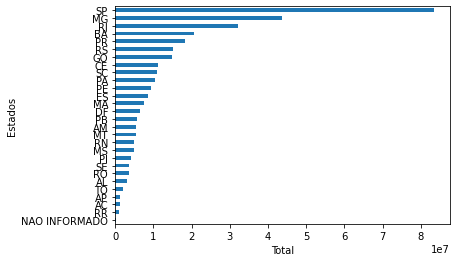

In [244]:
# Valores gastos com benefícios por ESTADO.
df.groupby("UF")["VALOR BENEFÍCIO"].sum().sort_values().plot.barh()
plt.xlabel("Total")
plt.ylabel("Estados")